# ArbitraryOutlierCapper
The ArbitraryOutlierCapper() caps the maximum or minimum values of a variable
at an arbitrary value indicated by the user.

The user must provide the maximum or minimum values that will be used <br>
to cap each variable in a dictionary {feature : capping_value}

### Example

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.outliers import ArbitraryOutlierCapper

In [2]:
def load_titanic():
    # Load dataset from OpenML
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    
    # Replace '?' with NaN
    data = data.replace('?', np.nan)
    
    # Extract first letter of cabin
    data['cabin'] = data['cabin'].astype(str).str[0]
    
    # Convert 'pclass' to categorical
    data['pclass'] = data['pclass'].astype('O')
    
    # Ensure 'age' contains only numeric data by coercing errors to NaN
    data['age'] = pd.to_numeric(data['age'], errors='coerce')
    
    # Fill missing values in 'age' with the median age
    data['age'].fillna(data['age'].median(), inplace=True)
    
    # Ensure 'fare' contains only numeric data by coercing errors to NaN
    data['fare'] = pd.to_numeric(data['fare'], errors='coerce')
    
    # Fill missing values in 'fare' with the median fare
    data['fare'].fillna(data['fare'].median(), inplace=True)
    
    # Fill missing values in 'embarked' with 'C'
    data['embarked'].fillna('C', inplace=True)
    
    # Drop irrelevant columns
    data.drop(labels=['name', 'ticket'], axis=1, inplace=True)
    
    return data

# Load the data
data = load_titanic()

# Display the first few rows of the cleaned data
data.head()

C:\Users\devanshu.tayal\AppData\Local\Temp\ipykernel_11292\2003671112.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
C:\Users\devanshu.tayal\AppData\Local\Temp\ipykernel_11292\2003671112.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,29.0000,0,0,211.3375,B,S,2,NaN,"St Louis, MO"
1,1,1,male,0.9167,1,2,151.5500,C,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,151.5500,C,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data.drop('survived', axis=1),
                                                    data['survived'],
                                                    test_size=0.3,
                                                    random_state=0)

print("train data:", X_train.shape)
print("test data:", X_test.shape)

train data: (916, 11)
test data: (393, 11)


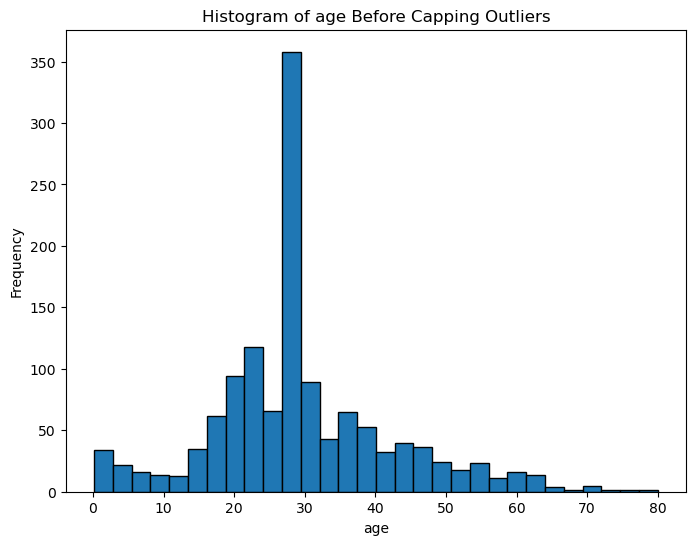

In [4]:
# Assuming 'data' is a DataFrame and has a 'fare' column
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=30, edgecolor='black')
plt.title('Histogram of age Before Capping Outliers')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()


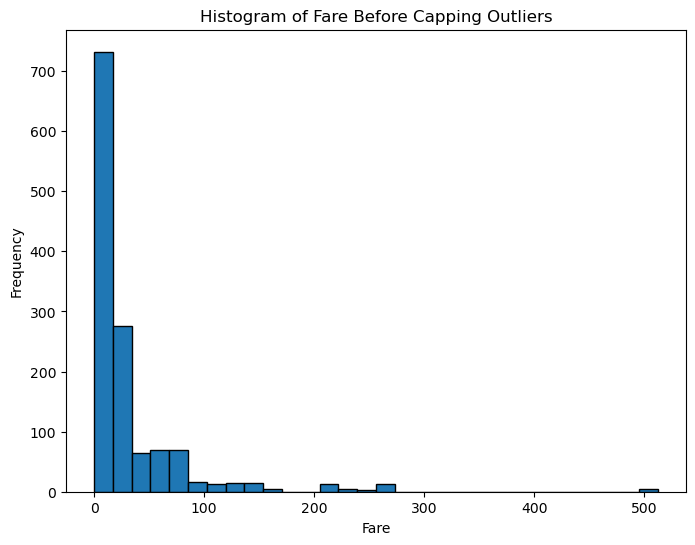

In [5]:
# Assuming 'data' is a DataFrame and has a 'fare' column
plt.figure(figsize=(8, 6))
plt.hist(data['fare'], bins=30, edgecolor='black')
plt.title('Histogram of Fare Before Capping Outliers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [6]:
# let's find out the maximum&minimum Age and maximum Fare in the titanic
print("Max age:", data.age.max())
print("Max fare:", data.fare.max())

print("Min age:", data.age.min())
print("Min fare:", data.fare.min())

Max age: 80.0
Max fare: 512.3292
Min age: 0.1667
Min fare: 0.0


### Maximum capping

In [7]:
'''Parameters
----------
max_capping_dict : dictionary, default=None
    Dictionary containing the user specified capping values for the right tail of
    the distribution of each variable (maximum values).

min_capping_dict : dictionary, default=None
    Dictionary containing user specified capping values for the eft tail of the
    distribution of each variable (minimum values).

missing_values : string, default='raise'
    Indicates if missing values should be ignored or raised. If
    `missing_values='raise'` the transformer will return an error if the
    training or the datasets to transform contain missing values.
'''

# capping of age and fare features at right tail
capper = ArbitraryOutlierCapper(
    max_capping_dict={'age': 50, 'fare': 150}, min_capping_dict=None)

capper.fit(X_train)

ArbitraryOutlierCapper(max_capping_dict={'age': 50, 'fare': 150})

In [8]:
# here we can find the maximum caps allowed
print("Maximum caps:", capper.right_tail_caps_)

Maximum caps: {'age': 50, 'fare': 150}


In [9]:
# this dictionary is empty, because we selected only right tail
capper.left_tail_caps_

{}

In [10]:
# transforming train and test data
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

#check max age and max fare after capping
print("Max age after capping:", train_t.age.max())
print("Max fare after capping:", train_t.fare.max())

Max age after capping: 50.0
Max fare after capping: 150.0


### Minimum capping

In [11]:
# capping outliers at left tail
capper = ArbitraryOutlierCapper(
    max_capping_dict=None, min_capping_dict={'age': 10, 'fare': 100})

capper.fit(X_train)

ArbitraryOutlierCapper(min_capping_dict={'age': 10, 'fare': 100})

In [12]:
# this dictionary is empty, because we selected only right tail
capper.right_tail_caps_

{}

In [13]:
# here we can find the minimum caps allowed
capper.left_tail_caps_

{'age': 10, 'fare': 100}

In [14]:
# transforming train and test set
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

# After capping
print("Min age:", train_t.age.min())
print("Min fare:", train_t.fare.min())

Min age: 10.0
Min fare: 100.0


### Both ends capping

In [15]:
# capping outliers at both tails
capper = ArbitraryOutlierCapper(
    min_capping_dict={'age': 5, 'fare': 5},
    max_capping_dict={'age': 60, 'fare': 150})
capper.fit(X_train)

ArbitraryOutlierCapper(max_capping_dict={'age': 60, 'fare': 150},
                       min_capping_dict={'age': 5, 'fare': 5})

In [16]:
# here we can find the maximum caps allowed
capper.right_tail_caps_

{'age': 60, 'fare': 150}

In [17]:
# here we can find the minimum caps allowed
capper.left_tail_caps_

{'age': 5, 'fare': 5}

In [18]:
# transforming train and test data
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

# After capping outliers
print("Max age:", train_t.age.max())
print("Max fare:", train_t.fare.max())

print("Min age:", train_t.age.min())
print("Min fare:", train_t.fare.min())

Max age: 60.0
Max fare: 150.0
Min age: 5.0
Min fare: 5.0


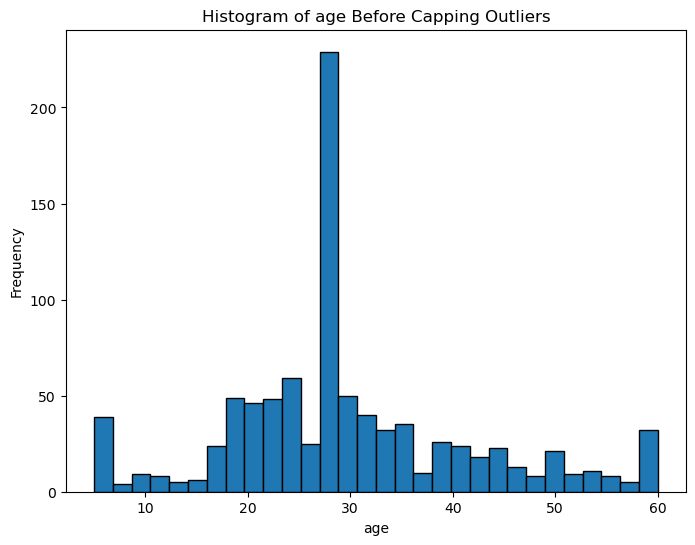

In [19]:
# Assuming 'data' is a DataFrame and has a 'fare' column
plt.figure(figsize=(8, 6))
plt.hist(train_t['age'], bins=30, edgecolor='black')
plt.title('Histogram of age Before Capping Outliers')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

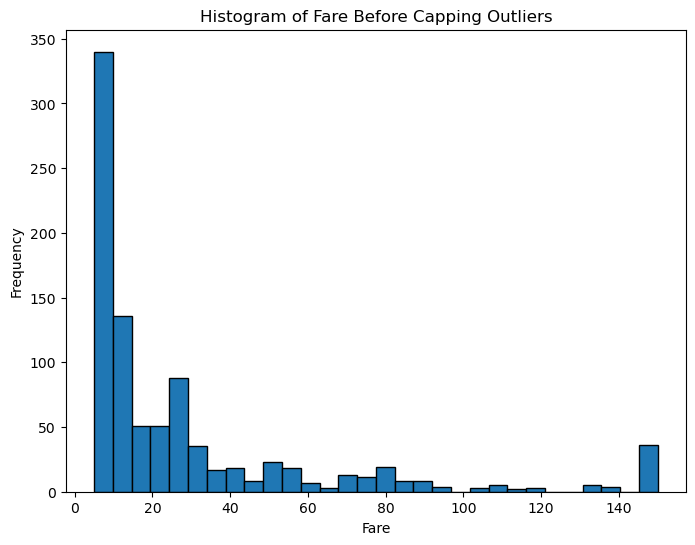

In [20]:
# Assuming 'data' is a DataFrame and has a 'fare' column
plt.figure(figsize=(8, 6))
plt.hist(train_t['fare'], bins=30, edgecolor='black')
plt.title('Histogram of Fare Before Capping Outliers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()